<a href="https://colab.research.google.com/github/s1c5000/library_study/blob/main/finish_at_once/pandas_merge_groupby_when.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

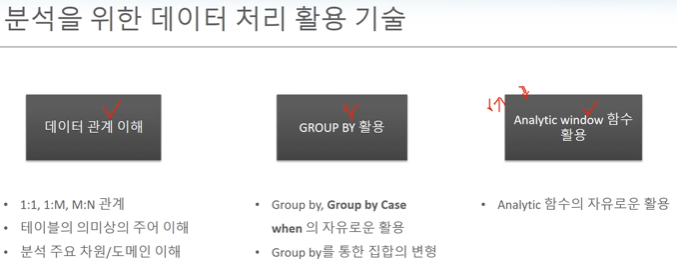

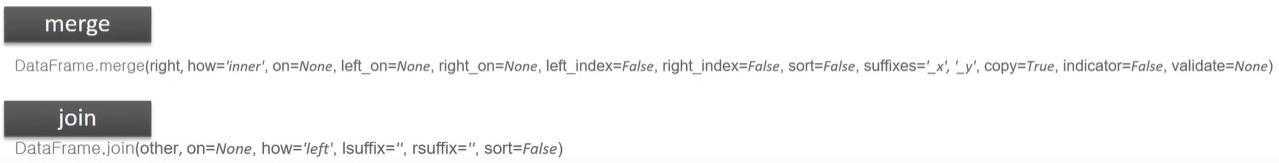

In [ ]:
import pandas as pd

## join

In [ ]:
d1 = {'customer_id' : [1,2,3,4,5,6],
      'product' : ['Oven','Oven','Oven','Television','Television','Television']}
df1 = pd.DataFrame(d1)

d2 = {'customer_id':[2,4,6,8],
      'state':['California', 'California','Texas','Hell']}
df2 = pd.DataFrame(d2)

In [ ]:
df1

,customer_id,product
0,1,Oven
1,2,Oven
2,3,Oven
3,4,Television
4,5,Television
5,6,Television


In [ ]:
df2

,customer_id,state
0,2,California
1,4,California
2,6,Texas
3,8,Hell


###Inner조인 수행

In [ ]:
# on은 인덱스로도 가능하다.
inner_join_result = pd.merge(df1,df2,on='customer_id', how='inner')
inner_join_result

,customer_id,product,state
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas


In [ ]:
# 같은 방법 보통 왼쪽에 놓을 DataFrame을 기준으로 접근한다
inner_join_result = df1.merge(df2, on='customer_id', how='inner')
inner_join_result

,customer_id,product,state
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas


### Left Outer조인 수행

In [ ]:
# 왼쪽에 둘 것(df1)을 기준으로 접근
left_outer_join_result = df1.merge(df2, on='customer_id', how='left')
left_outer_join_result

,customer_id,product,state
0,1,Oven,NaN
1,2,Oven,California
2,3,Oven,NaN
3,4,Television,California
4,5,Television,NaN
5,6,Television,Texas


###Right Outer 조인 수행

In [ ]:
# 위치는 항상 고정으로 넣는것이 헷갈리지 않는다
# how='right' 로 옵션을 줘서 df2가 기준이 되었다.
right_outer_join_result = df1.merge(df2, on='customer_id', how='right')
right_outer_join_result

,customer_id,product,state
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas
3,8,NaN,Hell


In [ ]:
# 접근하는 DataFrame 기준으로 위치가 정해진다 
left_outer_join_result_01 = df2.merge(df1, on='customer_id', how='left')
left_outer_join_result_01

,customer_id,state,product
0,2,California,Oven
1,4,California,Television
2,6,Texas,Television
3,8,Hell,NaN


### Full outer join 수행

In [ ]:
full_outer_join_result = pd.merge(df1, df2, on='customer_id', how='outer')
full_outer_join_result

,customer_id,product,state
0,1,Oven,NaN
1,2,Oven,California
2,3,Oven,NaN
3,4,Television,California
4,5,Television,NaN
5,6,Television,Texas
6,8,NaN,Hell


## group by

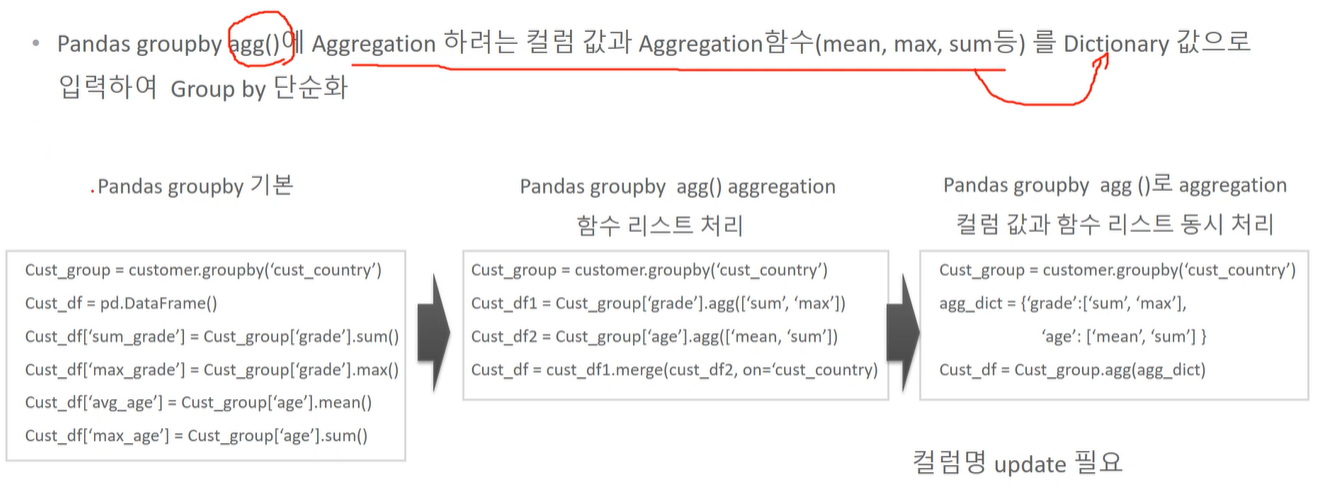

### DataFrame 생성

In [ ]:
cust_dict = {
    'customer_name':['Alice', 'Tom', 'James', 'Yerin', 'Min', 'Katherine', 'John', 'Park', 'Maria', 'Derik', 'Jin'],
    'cust_country':['US', 'GB', 'US', 'KOR', 'KOR', 'GB', 'US', 'KOR', 'US', 'GB', 'KOR'],
    'gender':['F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F'],
    'grade':[3, 1, 2, 5, 4, 3, 5, 7, 2, 4, 5],
    'age':[25, 34, 26, 33, 67, 29, 54, 21, 77, 29, 16]
}
customer = pd.DataFrame(cust_dict)

customer.head(11)

,customer_name,cust_country,gender,grade,age
0,Alice,US,F,3,25
1,Tom,GB,M,1,34
2,James,US,M,2,26
3,Yerin,KOR,F,5,33
4,Min,KOR,M,4,67
5,Katherine,GB,F,3,29
6,John,US,M,5,54
7,Park,KOR,M,7,21
8,Maria,US,F,2,77
9,Derik,GB,M,4,29


### SQL Group by
SELECT cust_country, sum(grade) sum_grade, max(grade) max_grade, avg(age) avg_age , max(age) max_age FROM customer group by cust_country

### Pandas Group by

#### groupby object생성

In [ ]:
# 보통 이렇게 필요할때 broupby로 묶고 필요한 열의 정보를 가져오지만
# 아래 코드처럼 
customer.groupby('cust_country')['grade'].sum()

cust_country
GB      8
KOR    21
US     12
Name: grade, dtype: int64

In [ ]:
# 기본형을 미리 지정해 놓는 것이 좋다
cust_group = customer.groupby('cust_country')
print(type(cust_group))
cust_group
# DataFrameGroupBy라는 표시를 볼수 있다.

pandas.core.groupby.generic.DataFrameGroupBy


In [ ]:
cust_group.head() # 굳이 출력을 하면 groupby하기 전과 같다.

,customer_name,cust_country,gender,grade,age
0,Alice,US,F,3,25
1,Tom,GB,M,1,34
2,James,US,M,2,26
3,Yerin,KOR,F,5,33
4,Min,KOR,M,4,67
5,Katherine,GB,F,3,29
6,John,US,M,5,54
7,Park,KOR,M,7,21
8,Maria,US,F,2,77
9,Derik,GB,M,4,29


#### 개별 aggregation 컬럼 밑 aggregation 연산별로 API 호출

In [ ]:
# groupby로 묶으면 key column이 인덱스로 빠진다.
cust_agg = pd.DataFrame()
cust_agg['sum_grade'] = cust_group['grade'].sum()
cust_agg['max_grade'] = cust_group['grade'].max()
cust_agg

,sum_grade,max_grade
cust_country,,
GB,8,4
KOR,21,7
US,12,5


In [ ]:
cust_agg['avg_age'] = cust_group['age'].mean()
cust_agg['max_agg'] = cust_group['age'].max()
cust_agg

,sum_grade,max_grade,avg_age,max_agg
cust_country,,,,
GB,8,4,30.666667,34
KOR,21,7,34.250000,67
US,12,5,45.500000,77


In [ ]:
# groupby  key column은 인덱스로 변환 됨으로 reset_index()해준다
print(cust_agg.index.name)
cust_agg = cust_agg.reset_index()
cust_agg

cust_country


,cust_country,sum_grade,max_grade,avg_age,max_agg
0,GB,8,4,30.666667,34
1,KOR,21,7,34.250000,67
2,US,12,5,45.500000,77


#### agg()함수를 활용, agg()인자로 aggregation 함수 리스트를 입력, 여전히 aggregation column별로 API 적용

In [ ]:
cust_agg1 = cust_group['grade'].agg(['sum','max'])
cust_agg2 = cust_group['age'].agg(['mean', 'max'])
cust_agg1

,sum,max
cust_country,,
GB,8,4
KOR,21,7
US,12,5


In [ ]:
cust_agg2

,mean,max
cust_country,,
GB,30.666667,34
KOR,34.250000,67
US,45.500000,77


In [ ]:
# index를 기준으로도 merge를 할 수 있다.
# 이렇게 하면 컬럼이 중복이 된다.
cust_agg = cust_agg1.merge(cust_agg2, on='cust_country', how='left')
cust_agg.head()

,sum,max_x,mean,max_y
cust_country,,,,
GB,8,4,30.666667,34
KOR,21,7,34.250000,67
US,12,5,45.500000,77


In [ ]:
# 위는 중복되는 컬럼을 볼 수 있다. 이를 막기위해 처음 생성시 column명을 다르게 하는것이 좋다.
cust_agg = pd.DataFrame()
cust_agg[['sum_grade', 'max_grade']]= cust_group['grade'].agg(['sum', 'max'])
cust_agg[['avg_age', 'max_age']] = cust_group['age'].agg(['mean','max'])
cust_agg = cust_agg.reset_index()
cust_agg

,cust_country,sum_grade,max_grade,avg_age,max_age
0,GB,8,4,30.666667,34
1,KOR,21,7,34.250000,67
2,US,12,5,45.500000,77


#### agg()에 인자로 Aggregation 컬럼값과 Aggregation 함수 리스트를 기재한 dictionary값 입력

In [ ]:
# 복잡할 경우 dict로 지정하는것이 좋다 
agg_dict = {
    'grade' : ['sum', 'max'],
    'age' : ['mean', 'max']
}
cust_agg = cust_group.agg(agg_dict)
cust_agg # 이렇게 하면 컬럼이 중복이 된다.

grade            age    
               sum max       mean max
cust_country                         
GB               8   4  30.666667  34
KOR             21   7  34.250000  67
US              12   5  45.500000  77

In [ ]:
# 올바른 컬럼 할당
print(cust_agg.columns)

MultiIndex([('grade',  'sum'),
            ('grade',  'max'),
            (  'age', 'mean'),
            (  'age',  'max')],
           )


In [ ]:
cust_agg.columns = [('_').join(column) for column in cust_agg.columns]
cust_agg

,grade_sum,grade_max,age_mean,age_max
cust_country,,,,
GB,8,4,30.666667,34
KOR,21,7,34.250000,67
US,12,5,45.500000,77


## group by case when

group by 로 묶고 그 중 필요한 것만 뽑을때 사용     


###SQL     
SELECT cust_country, sum(grade) total_sum,
Sum(case when gender==‘M’ then grade end) male_sum,
Sum(case when gender==‘F’ then grade end) female_sum FROM customer GROUP BY cust_country

###pandas에선 filtering을 하고 join하는 식의 코드를 많이쓴다     
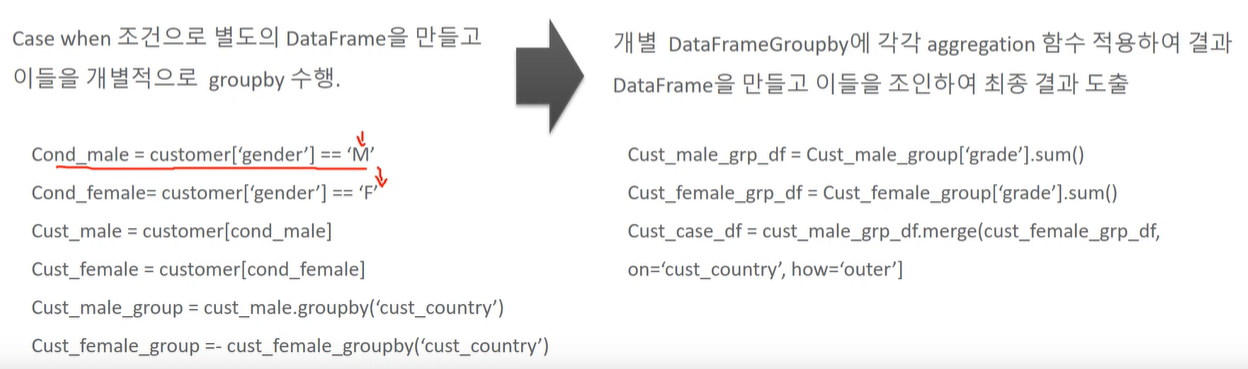

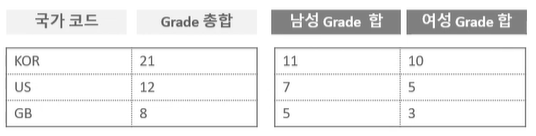

#### 별도의 DataFrame생성

In [ ]:
cond_male = customer['gender'] == 'M'
cond_female = customer['gender'] == 'F'
cust_male = customer[cond_male]
cust_female = customer[cond_female]

In [ ]:
cust_female

,customer_name,cust_country,gender,grade,age
0,Alice,US,F,3,25
3,Yerin,KOR,F,5,33
5,Katherine,GB,F,3,29
8,Maria,US,F,2,77
10,Jin,KOR,F,5,16


####원본 데이터에 cust_country로 groupby수행

In [ ]:
cust_agg = customer.groupby('cust_country')['grade'].sum()
cust_agg = cust_agg.reset_index()

In [ ]:
cust_agg

,cust_country,grade
0,GB,8
1,KOR,21
2,US,12


#### filtering 된 데이터에 cust_country로 groupby수행

In [ ]:
cust_male_agg = cust_male.groupby('cust_country')['grade'].sum()
cust_female_agg = cust_female.groupby('cust_country')['grade'].sum()
cust_male_agg = cust_male_agg.reset_index()
cust_female_agg = cust_female_agg.reset_index()

In [ ]:
cust_male_agg

,cust_country,grade
0,GB,5
1,KOR,11
2,US,7


#### 원본데이터에 groupby 된 데이터 세트와 filtering된 데이터에 groupby된 데이터 세트를 조인


In [ ]:
cust_agg = cust_agg.merge(cust_male_agg, on='cust_country', how='left')
cust_agg = cust_agg.merge(cust_female_agg, on='cust_country', how='left')
cust_agg

,cust_country,grade_x,grade_y,grade
0,GB,8,5,3
1,KOR,21,11,10
2,US,12,7,5


In [ ]:
cust_agg.columns = ['cust_country','sum_grade','sum_male_grade','sum_female_grade']

In [ ]:
cust_agg

,cust_country,sum_grade,sum_male_grade,sum_female_grade
0,GB,8,5,3
1,KOR,21,11,10
2,US,12,7,5
